In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Statistics
from pyevolve import G1DList
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
from sys import exit
from pyevolve import DBAdapters
import sys, random
from math import sqrt
import geopy.distance
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Nous avons besoin d'une fonction pour calculer la distance entre deux villes sur une sphère.**

In [2]:
def distance_between_two_cities(city_1, city_2):

    return geopy.distance.vincenty(city_1, city_2).km

**Nous avons les latitudes et longitudes de nos 14 villes**

In [3]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]
LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

**Ensuite, d'une liste de nos villes**

In [4]:
cities = []

for index in range(len(LAT)):
    cities.append((LAT[index], LON[index]))

cities_nb = len(cities)

In [5]:
print("Il y a {} points".format(cities_nb))

Il y a 14 points


In [6]:
map_coords_to_city = {}
map_city_to_coords = {}

for city, coords in enumerate(cities):
    map_coords_to_city[coords] = city
    map_city_to_coords[city] = coords

In [7]:
map_coords_to_city

{(14.05, 98.12): 9,
 (16.3, 97.38): 8,
 (16.47, 94.44): 1,
 (16.47, 96.1): 0,
 (16.53, 97.38): 10,
 (17.2, 96.29): 7,
 (19.41, 97.13): 12,
 (20.09, 92.54): 2,
 (20.09, 94.55): 13,
 (20.47, 97.02): 6,
 (21.52, 95.59): 11,
 (22.0, 96.05): 5,
 (22.39, 93.37): 3,
 (25.23, 97.24): 4}

In [8]:
map_city_to_coords

{0: (16.47, 96.1),
 1: (16.47, 94.44),
 2: (20.09, 92.54),
 3: (22.39, 93.37),
 4: (25.23, 97.24),
 5: (22.0, 96.05),
 6: (20.47, 97.02),
 7: (17.2, 96.29),
 8: (16.3, 97.38),
 9: (14.05, 98.12),
 10: (16.53, 97.38),
 11: (21.52, 95.59),
 12: (19.41, 97.13),
 13: (20.09, 94.55)}

Nous allons remplir une matrice de toutes les distances

In [9]:
distances = np.empty((cities_nb,cities_nb),dtype=float)

for i in range(cities_nb):
    for j in range(cities_nb):
        distances[i][j] = distance_between_two_cities(map_city_to_coords[i], map_city_to_coords[j])

for i in range(cities_nb):
    distances[i][i] = np.Infinity
        
distances

c:\users\nortalle\.conda\envs\python27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[          inf,  177.25529289,  549.69797241,  715.23136882,
         977.08809767,  612.16906546,  453.27693899,   83.28646194,
         138.02637295,  344.64296012,  136.81909176,  561.5687481 ,
         343.20248949,  432.88513714],
       [ 177.25529289,           inf,  448.20030869,  664.88499417,
        1012.59214777,  635.09749238,  519.84490674,  213.07693554,
         314.6315004 ,  477.4274839 ,  313.95403982,  571.95104846,
         432.52008727,  400.84443405],
       [ 549.69797241,  448.20030869,           inf,  268.83362232,
         746.37501598,  421.65770688,  469.85601377,  508.76031818,
         661.80599804,  893.97228288,  645.71717911,  354.78740387,
         486.91929058,  210.21956773],
       [ 715.23136882,  664.88499417,  268.83362232,           inf,
         504.3761671 ,  279.71214503,  433.99291131,  650.86440952,
         794.83657799, 1050.69181769,  773.21585314,  248.7227221 ,
         511.69134971,  282.57793114],
       [ 977.08809767, 1012.

In [10]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np

# # make sure the value of resolution is a lowercase L,
# #  for 'low', not a numeral 1
# map = Basemap(projection='merc', lat_0=57, lon_0=-135,
#     resolution = 'h', area_thresh = 1000.0,
#     llcrnrlon=-136.25, llcrnrlat=56,
#     urcrnrlon=-134.25, urcrnrlat=57.75)

# map.drawcoastlines()
# map.drawcountries()
# map.fillcontinents(color='coral')
# map.drawmapboundary()

# map.drawmeridians(np.arange(0, 360, 30))
# map.drawparallels(np.arange(-90, 90, 30))

# plt.show()

**Nous allons dessiner un graphe complet, il y a 14 villes, donc il y aura `14*(14-1)/2` donc 91 arêtes**

In [11]:
# edges = {}

# k = 0

# for i, point_j in enumerate(cities):
#     for j in range(i, len(cities)):
#         if i != j:
#             edges[k] = (map_coords_to_city[cities[i]], map_coords_to_city[cities[j]])
#             k += 1
# edges_nb = len(edges)

In [12]:
# edges

In [13]:
# print("Il y a {} arêtes".format(edges_nb))

In [14]:
# ord('A')

In [15]:
def tour_length(tour):
    """ Returns the total length of the tour """
    total = 0
    for i in range(cities_nb):
        j = (i+1) % cities_nb
        city_i = tour[i]
        city_j = tour[j]
        total += distances[city_i,city_j]
    return total

In [16]:
def G1DListTSPInitializator(genome, **args):
    """ The initializator for the TSP """
    genome.clearList()
    lst = [i for i in xrange(cities_nb)]

    for i in xrange(cities_nb):
        choice = random.choice(lst)
        lst.remove(choice)
        genome.append(choice)

In [17]:
def fitness(chromosome):
#     print("CHROMOSOME : ", chromosome)
    
    
    return tour_length(chromosome)

In [18]:
# # Chromosome representation

# crossoverRate_list = [0.85, 0.9, 0.95]
# mutationRate_list = [0.01, 0.02, 0.03]
# populationSize_list = [50, 80, 100]
# generation_list = [750, 1000, 1250]

# min_somme = np.Infinity
# min_config = None

# for h in crossoverRate_list:
#     for j in mutationRate_list:
#         for k in populationSize_list:
#             for l in generation_list:
#                 somme = []
#                 for m in range(5):
                
#                     # set the alleles to the cities numbers
#                     setOfAlleles = GAllele.GAlleles(homogeneous=True)
#                     lst = [ i for i in xrange((cities_nb)) ]
#                     a = GAllele.GAlleleList(lst)
#                     setOfAlleles.add(a)

#                     genome = G1DList.G1DList((cities_nb))
#                     genome.setParams(allele=setOfAlleles)

#                     genome.evaluator.set(fitness)
#                     genome.mutator.set(Mutators.G1DListMutatorSwap)
#                     genome.crossover.set(Crossovers.G1DListCrossoverOX)
#                     genome.initializator.set(G1DListTSPInitializator)

#                     # GA initialisation

#                     ga = GSimpleGA.GSimpleGA(genome)
#                     ga.setMinimax(Consts.minimaxType["minimize"])
#                     ga.setCrossoverRate(h)
#                     ga.setMutationRate(j)
#                     ga.setPopulationSize(k)

#                     # Number of generations

#                     ga.setGenerations(l)

#                     # In case we want to monitor the evolution process
#                     # execute the function current_best every generation
#                     #ga.stepCallback.set(current_best)

#                     ga.evolve(freq_stats=0)

#                     somme.append(tour_length(ga.bestIndividual()))
                    
#                 current_somme = np.mean(somme)
#                 print(h, j, k, l, current_somme)
#                 if current_somme < min_somme:
#                     min_somme = current_somme
#                     min_config = (h, j, k, l)


+ (0.85, 0.01, 50, 750, 3466.888818560845)
+ (0.85, 0.01, 50, 1000, 3692.538991053122)
+ (0.85, 0.01, 50, 1250, 3595.3925932539087)
+ (0.85, 0.01, 80, 750, 3727.4784119287565)
+ (0.85, 0.01, 80, 1000, 3660.4368763889665)
+ (0.85, 0.01, 80, 1250, 3523.069986075368)
+ (0.85, 0.01, 100, 750, 3474.109100734233)
+ (0.85, 0.01, 100, 1000, 3469.043326299269)
+ (0.85, 0.01, 100, 1250, 3398.2955002753906)
+ (0.85, 0.02, 50, 750, 3557.682623278745)
+ (0.85, 0.02, 50, 1000, 3361.895689432781)
+ (0.85,+  0.02, 50, 1250, 3411.9721532156245)
+ (0.85, 0.02, 80, 750, 3723.508139196282)
+ (0.85, 0.02, 80, 1000, 3440.4063056965874)
+ (0.85, 0.02, 80, 1250, 3382.8405555604463)
+ (0.85, 0.02, 100, 750, 3533.7662063822127)
+ (0.85, 0.02, 100, 1000, 3424.1104140404814)
+ (0.85, 0.02, 100, 1250, 3431.59970039378)
+ (0.85, 0.03, 50, 750, 3378.269152487809)
+ (0.85, 0.03, 50, 1000, 3370.0824209602956)
+ (0.85, 0.03, 50, 1250, 3470.840347858187)
+ (0.85, 0.03, 80, 750, 3425.076657704438)
+ (0.85, 0.03, 80, 1000, 3419.5390109678456)
+ (0.85, 0.03, 80, 1250, 3439.7864319212945)
+ (0.85, 0.03, 100, 750, 3403.9101853417005)
+ (0.85, 0.03, 100, 1000, 3375.273697808225)
+ (0.85, 0.03, 100, 1250, 3370.7022947355886)
+ (0.9, 0.01, 50, 750, 3488.850299963547)
+ (0.9, 0.01, 50, 1000, 3472.282430461287)
+ (0.9, 0.01, 50, 1250, 3403.7854216881105)
+ (0.9, 0.01, 80, 750, 3418.12967372751)
+ (0.9, 0.01, 80, 1000, 3500.166210696202)
+ (0.9, 0.01, 80, 1250, 3445.1024724228146)
+ (0.9, 0.01, 100, 750, 3367.0869662807104)
+ (0.9, 0.01, 100, 1000, 3553.4272570729286)
+ (0.9, 0.01, 100, 1250, 3447.353289673515)
+ (0.9, 0.02, 50, 750, 3419.461439568923)
+ (0.9, 0.02, 50, 1000, 3371.3221685108815)
+ (0.9, 0.02, 50, 1250, 3478.0372154396346)
+ (0.9, 0.02, 80, 750, 3390.407413312666)
+ (0.9, 0.02, 80, 1000, 3411.3522794403316)
+ (0.9, 0.02, 80, 1250, 3447.353289673515)
+ (0.9, 0.02, 100, 750, 3442.4832420360895)
+ (0.9, 0.02, 100, 1000, 3380.589738309745)
+ (0.9, 0.02, 100, 1250, 3354.948705455853)
+ (0.9, 0.03, 50, 750, 3475.8650135534017)
+ (0.9, 0.03, 50, 1000, 3362.515563208074)
+ (0.9, 0.03, 50, 1250, 3398.5941448401804)
+ (0.9, 0.03, 80, 750, 3450.5929269047388)
+ (0.9, 0.03, 80, 1000, 3379.508900038396)
+ (0.9, 0.03, 80, 1250, 3370.702294735588)
+ (0.9, 0.03, 100, 750, 3362.515563208074)
+ (0.9, 0.03, 100, 1000, 3382.2206817851525)
+ (0.9, 0.03, 100, 1250, 3370.082420960295)
+ (0.95, 0.01, 50, 750, 3533.53717295576)
+ (0.95, 0.01, 50, 1000, 3584.7398319680274)
+ (0.95, 0.01, 50, 1250, 3354.9487054558535)
+ (0.95, 0.01, 80, 750, 3583.7346832881403)
+ (0.95, 0.01, 80, 1000, 3440.309996184311)
+ (0.95, 0.01, 80, 1250, 3540.55262146569)
+ (0.95, 0.01, 100, 750, 3583.064661632583)
+ (0.95, 0.01, 100, 1000, 3446.733415898222)
+ (0.95, 0.01, 100, 1250, 3424.1104140404823)
(0.95, 0.02, 50, 750, 3468.3228312942674)
(0.95, 0.02, 50, 1000, 3439.166558146001)
(0.95, 0.02, 50, 1250, 3417.5097999522172)
(0.95, 0.02, 80, 750, 3432.219574169074)
(0.95, 0.02, 80, 1000, 3395.598690160596)
(0.95, 0.02, 80, 1250, 3418.9191371925517)
(0.95, 0.02, 100, 750, 3354.32883168056)
(0.95, 0.02, 100, 1000, 3402.5456741375237)
(0.95, 0.02, 100, 1250, 3378.269152487809)
(0.95, 0.03, 50, 750, 3415.364868383664)
(0.95, 0.03, 50, 1000, 3378.889026263103)
(0.95, 0.03, 50, 1250, 3370.082420960295)
(0.95, 0.03, 80, 750, 3452.622137920368)
(0.95, 0.03, 80, 1000, 3468.29815580118)
(0.95, 0.03, 80, 1250, 3398.5941448401804)
(0.95, 0.03, 100, 750, 3440.4063056965883)
(0.95, 0.03, 100, 1000, 3378.889026263102)
(0.95, 0.03, 100, 1250, 3403.1655479128167)

In [19]:
# min_somme

In [20]:
# min_config

In [46]:
# set the alleles to the cities numbers
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange((cities_nb)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList((cities_nb))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

# GA initialisation

ga = GSimpleGA.GSimpleGA(genome)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(0.95)
ga.setMutationRate(0.02)
ga.setPopulationSize(100)

# Number of generations

ga.setGenerations(80)

sqlite_adapter = DBAdapters.DBSQLite(identify="GuidouxHochet_TSV")
ga.setDBAdapter(sqlite_adapter)

# In case we want to monitor the evolution process
# execute the function current_best every generation
#ga.stepCallback.set(current_best)

ga.evolve(freq_stats=0)
tour_length(ga.bestIndividual())

3346.761973928339

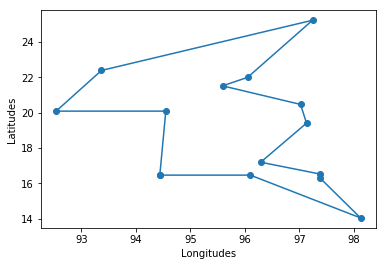

In [47]:
sol = ga.bestIndividual()
sol_lat = []
sol_long = []

for i in range(0,len(sol)):
    sol_lat.append(map_city_to_coords[sol[i]][0])
    sol_long.append(map_city_to_coords[sol[i]][1])
    

sol_lat.append(map_city_to_coords[sol[0]][0])
sol_long.append(map_city_to_coords[sol[0]][1])

plt.xlabel("Longitudes")
plt.ylabel("Latitudes")

plt.plot(sol_long, sol_lat, '-o')
plt.show()

In [48]:
tour_length(ga.bestIndividual())

3346.761973928339

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
80 generations found !


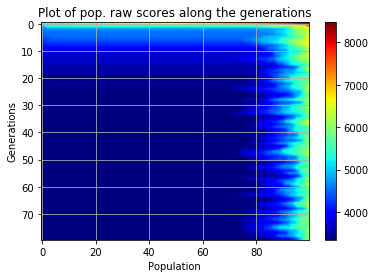

<Figure size 432x288 with 0 Axes>

In [49]:
%run pyevolve_graph.py -i GuidouxHochet_TSV -8

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
80 generations found !


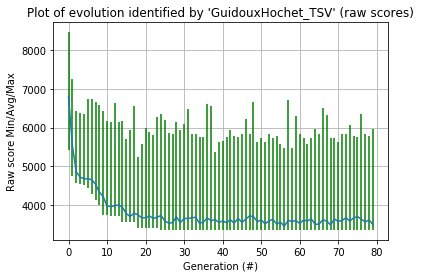

In [50]:
%run pyevolve_graph.py -i GuidouxHochet_TSV -1

In [51]:
# from itertools import permutations 
  
# # Get all permutations of [1, 2, 3] 
# perm = permutations(range(14)) 
  
# i = 0    
# # Print the obtained permutations 
# for i in list(perm): 
#     i += 1 
    
# print(i)

In [53]:
best_order = [1, 13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9, 0]

In [55]:
for i, city in enumerate(best_order):
    print("{} : {}".format(i, map_city_to_coords[city]))

0 : (16.47, 94.44)
1 : (20.09, 94.55)
2 : (20.09, 92.54)
3 : (22.39, 93.37)
4 : (25.23, 97.24)
5 : (22.0, 96.05)
6 : (21.52, 95.59)
7 : (20.47, 97.02)
8 : (19.41, 97.13)
9 : (17.2, 96.29)
10 : (16.53, 97.38)
11 : (16.3, 97.38)
12 : (14.05, 98.12)
13 : (16.47, 96.1)
